This is an example implementation of some code I wrote to help with doing beam bending calculations for my Solid Mechanics class. It implements macaulay functions and beam boundary conditions. You still have to do a good deal of the work yourself but it generaly helps a lot with the integration which can be easy to make small errors on.

Eq(0, 16000000000000.0*t0 + 33600000.0)

[-2.10000000000000e-6]


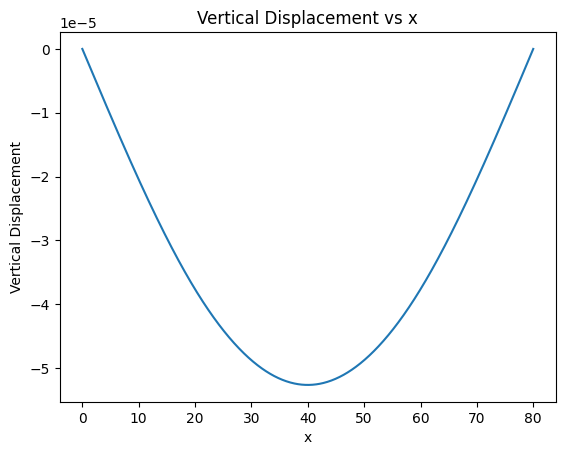

In [2]:
from numpy import maximum, linspace
import matplotlib.pyplot as plt
import sympy as sp

class Mac:
    def __init__(self, mult, a, n):
        self.mult = mult
        self.a = a
        self.n = n
    
    def val(self, x):
        if self.n < 0:
            return 0
        if self.n == 0:
            if x - self.a >= 0:
                return self.mult
            else:
                return 0
        else:
            return self.mult * maximum(0, (x-self.a))**self.n
        
    def integrate(self):
        iMac = Mac(self.mult, self.a, self.n)
        if iMac.n < 0:
            iMac.n += 1
        else:
            iMac.n += 1
            iMac.mult = iMac.mult / (iMac.n)
        return iMac
    
    def __repr__(self):
        return f"{self.mult}<x - {self.a}>^{self.n}"

def calc(macList, x):
    return sum([mac.val(x) for mac in macList])

class MMHandler:
    def __init__(self, loadList):
        self.w = loadList
        self.V = [term.integrate() for term in self.w]
        self.M = [term.integrate() for term in self.V]
    
    def getCurvature(self, E, I, x):
        curvature = [term.integrate() for term in self.M]
        print(curvature)
        t0 = sp.symbols('t0')
        return calc(curvature, x) + E*I*t0
        
    def getVertical(self, E, I, x):
        vertical = [term.integrate().integrate() for term in self.M]
        t0, v0 = sp.symbols('t0 v0')
        return calc(vertical, x) + E*I*t0*x + E*I*v0

    def plotShear(self, l, title="Shear load along beam", xlabel="x in m", ylabel="Shear load in N"):
        distList = linspace(0, l, 1000)
        Vlist = [calc(self.V, x) for x in distList]
        plt.plot(distList, Vlist)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid()
        plt.show()

    def plotBending(self, l, title="Bending Moment along beam", xlabel="x in m", ylabel="Bending Moment in N*m"):
        distList = linspace(0, l, 1000)
        MList = [calc(self.M, x) for x in distList]
        plt.plot(distList, MList)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid()
        plt.show()

ra = 650
rb = 650 
w = [Mac(ra, 0, -1), 
     Mac(-500, 20, -1),
     Mac(-300, 40, -1),
     Mac(-500, 60, -1),
     Mac(rb, 80, -1)]
system = MMHandler(w)

E = 200e9
I = 1
x = 40

v0, t0 = sp.symbols('v0 t0')

re = sp.Eq(0, system.getVertical(E, I, 0)) # based on the boundary conditions
re = sp.Eq(0, system.getVertical(E, I, 80)).subs(v0, 0) # based on the boundary conditions and sol'n at x = 0
display(re)
sols = sp.solve(re, t0)
print(sols)
t0Val = sols[0]
v0Val = 0

distList = linspace(0, 80, 1000)
vals = [( (1/ (E * I)) * system.getVertical(E, I, x)).subs(t0, t0Val).subs(v0, v0Val) for x in distList]
plt.plot(distList, vals)
plt.xlabel("x")
plt.ylabel("Vertical Displacement")
plt.title("Vertical Displacement vs x")
plt.show()
